In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("dark_background")

In [50]:
# 1

var1 = pd.read_excel("data/Вариант 1.xlsx", skiprows=2)
var2 = pd.read_excel("data/Вариант 2.xlsx", skiprows=2)
var3 = pd.read_excel("data/Вариант 3.xlsx", skiprows=2)
var4 = pd.read_excel("data/Вариант 4.xlsx", skiprows=2)

vars = [var1, var2, var3, var4]

In [62]:
# 2

for df in vars:
    print(df.info())
    print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   №                              3048 non-null   float64
 1   № школы                        3048 non-null   float64
 2   Класс                          3048 non-null   object 
 3   Пол                            3048 non-null   object 
 4   Номер варианта                 3048 non-null   float64
 5   Задания с кратким ответом      3048 non-null   object 
 6   Задания с развёрнутым ответом  3048 non-null   object 
 7   Устная часть                   1 non-null      object 
 8   Первичный балл                 3048 non-null   float64
 9   Балл                           3049 non-null   float64
 10  Минимальный балл               3048 non-null   float64
dtypes: float64(6), object(5)
memory usage: 262.2+ KB
None
                 №      № школы  Номер варианта  Перви

In [125]:
# 3

print("ниже среднего:")

for df in vars:
    print(f"{len(df[df['Балл'] < df['Балл'].mean()]) / len(df) * 100:.2f}%")

ниже среднего:
51.26%
47.98%
56.22%
45.77%


In [126]:
# 4

print("не сдавшие:")

for df in vars:
    print(f"{len(df[df['Балл'] < df['Минимальный балл']]) / len(df):.2f}%")

не сдавшие:
0.00%
0.09%
0.08%
0.11%


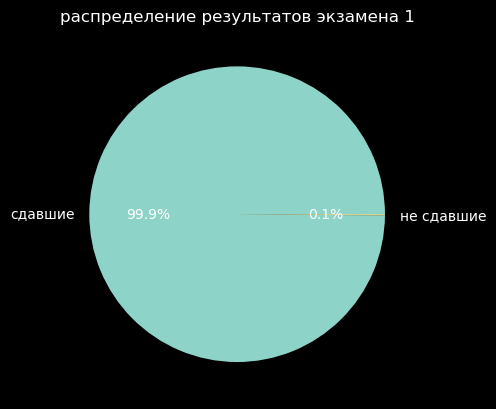

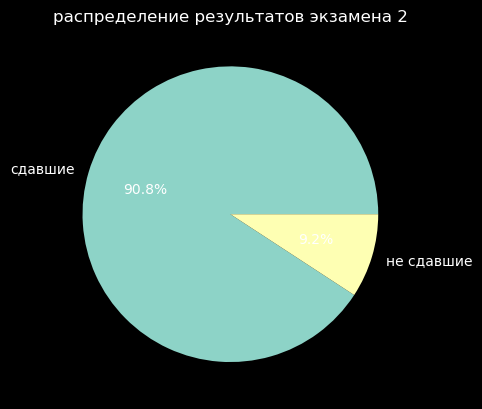

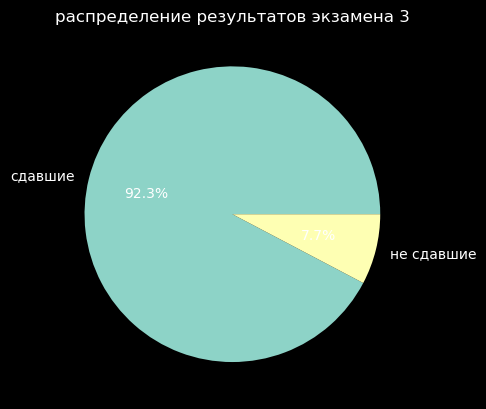

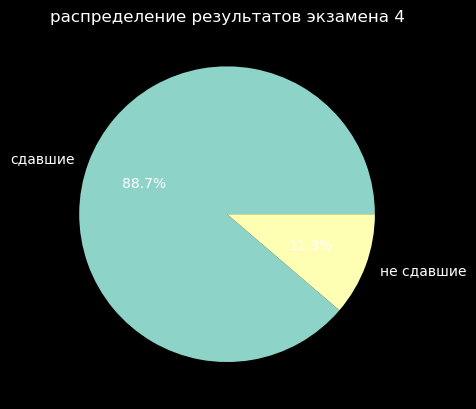

In [54]:
# 5

for i, df in enumerate(vars):
    not_passed = len(df[df["Балл"] < df["Минимальный балл"]])
    passed = len(df) - not_passed
    plt.pie([passed, not_passed], labels=["сдавшие", "не сдавшие"], autopct="%1.1f%%")
    plt.title(f"распределение результатов экзамена {i + 1}")
    plt.show()

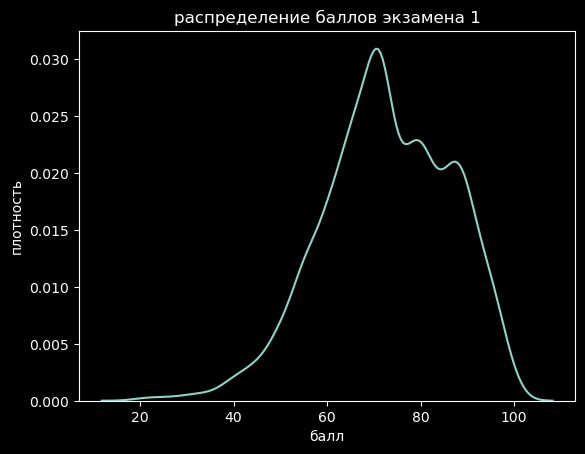

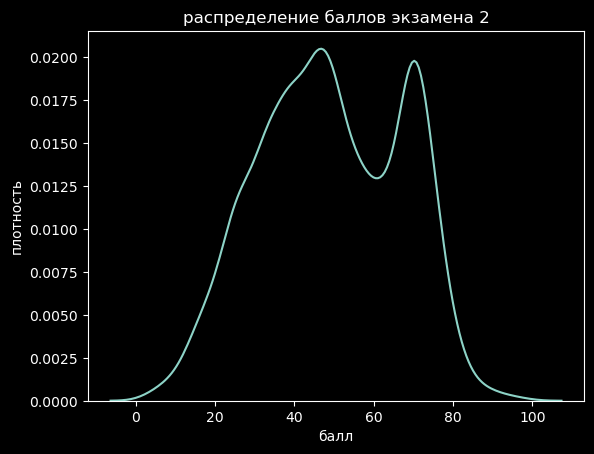

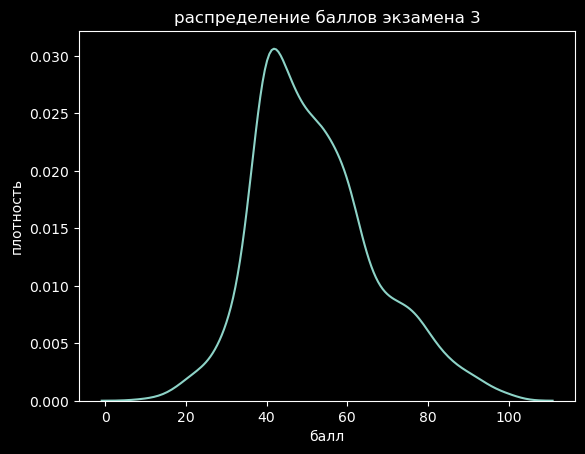

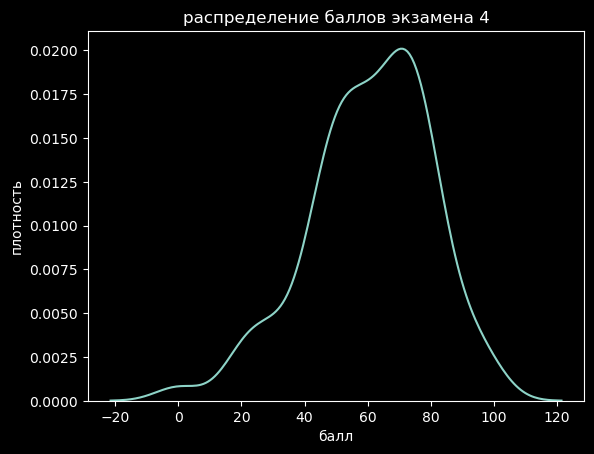

In [66]:
# 6

for i, df in enumerate(vars):
    sns.kdeplot(df["Балл"])
    plt.xlabel("балл")
    plt.ylabel("плотность")
    plt.title(f"распределение баллов экзамена {i + 1}")
    plt.show()

In [124]:
# 7

for df in vars:
    print(f"отлично: {len(df[df['Балл'] >= 85]) / len(df) * 100:.2f}%")
    print(
        f"хорошо: {len(df[(65 <= df['Балл']) & (df['Балл'] < 85)]) / len(df) * 100:.2f}%"
    )
    print(
        f"удовлетворительно: {len(df[(df['Минимальный балл'] <= df['Балл']) & (df['Балл'] < 65)]) / len(df) * 100:.2f}%"
    )
    print(
        f"неудовлетворительно: {len(df[df['Балл'] < df['Минимальный балл']]) / len(df) * 100:.2f}%\n"
    )

отлично: 24.63%
хорошо: 49.33%
удовлетворительно: 25.91%
неудовлетворительно: 0.13%

отлично: 0.64%
хорошо: 24.95%
удовлетворительно: 65.17%
неудовлетворительно: 9.21%

отлично: 2.96%
хорошо: 15.58%
удовлетворительно: 73.67%
неудовлетворительно: 7.71%

отлично: 7.04%
хорошо: 40.14%
удовлетворительно: 40.85%
неудовлетворительно: 11.27%



In [127]:
# 8

for df in vars:
    male = len(df[df["Пол"] == "М"]) / len(df) * 100
    print(f"юношей:  {male:.2f}%")
    print(f"девушек: {100 - male:.2f}%\n")

юношей:  42.01%
девушек: 57.99%

юношей:  47.14%
девушек: 52.86%

юношей:  68.59%
девушек: 31.41%

юношей:  76.76%
девушек: 23.24%



In [65]:
# 9

print("разных школ:")

for df in vars:
    print(df["№ школы"].nunique())

разных школ:
24
17
19
10


In [78]:
# 10

for df in vars:
    print("с кратким ответом:", len(df["Задания с кратким ответом"][0]))
    print(
        "с развёрнутым ответом:",
        len(df["Задания с развёрнутым ответом"][0]) // 4,
        end="\n\n",
    )

с кратким ответом: 25
с развёрнутым ответом: 12 

с кратким ответом: 12
с развёрнутым ответом: 7 

с кратким ответом: 27
с развёрнутым ответом: 5 

с кратким ответом: 23
с развёрнутым ответом: 4 



In [122]:
# 11

for df in vars:
    col = df["Задания с кратким ответом"][df["Задания с кратким ответом"].notnull()]
    not_completed = [0] * len(col[0])
    for res in col:
        for i, task in enumerate(res):
            if task == "-" or task == "0":
                not_completed[i] += 1
    for i, n in enumerate(not_completed):
        nc = n / len(col) * 100
        print(f"B{i + 1}: выполненных {100 - nc:.2f}%, невыполненных {nc:.2f}%")
    print()

B1: выполненных 98.69%, невыполненных 1.31%
B2: выполненных 92.88%, невыполненных 7.12%
B3: выполненных 87.34%, невыполненных 12.66%
B4: выполненных 77.30%, невыполненных 22.70%
B5: выполненных 58.96%, невыполненных 41.04%
B6: выполненных 90.62%, невыполненных 9.38%
B7: выполненных 95.05%, невыполненных 4.95%
B8: выполненных 75.59%, невыполненных 24.41%
B9: выполненных 84.12%, невыполненных 15.88%
B10: выполненных 96.88%, невыполненных 3.12%
B11: выполненных 93.18%, невыполненных 6.82%
B12: выполненных 75.52%, невыполненных 24.48%
B13: выполненных 83.14%, невыполненных 16.86%
B14: выполненных 70.18%, невыполненных 29.82%
B15: выполненных 97.60%, невыполненных 2.40%
B16: выполненных 68.96%, невыполненных 31.04%
B17: выполненных 67.22%, невыполненных 32.78%
B18: выполненных 74.18%, невыполненных 25.82%
B19: выполненных 69.36%, невыполненных 30.64%
B20: выполненных 82.74%, невыполненных 17.26%
B21: выполненных 71.85%, невыполненных 28.15%
B22: выполненных 48.06%, невыполненных 51.94%
B23:

In [121]:
# 12

for df in vars:
    col = df["Задания с развёрнутым ответом"][
        df["Задания с развёрнутым ответом"].notnull()
    ]
    not_completed = [0] * (len(col[0]) // 4)
    for res in col:
        for i, task in enumerate(res[::4]):
            if task == "0":
                not_completed[i] += 1
    for i, n in enumerate(not_completed):
        nc = n / len(col) * 100
        print(f"C{i + 1}: выполненных {100 - nc:.2f}%, невыполненных {nc:.2f}%")
    print()

C1: выполненных 96.75%, невыполненных 3.25%
C2: выполненных 94.72%, невыполненных 5.28%
C3: выполненных 94.46%, невыполненных 5.54%
C4: выполненных 94.26%, невыполненных 5.74%
C5: выполненных 96.46%, невыполненных 3.54%
C6: выполненных 97.44%, невыполненных 2.56%
C7: выполненных 92.39%, невыполненных 7.61%
C8: выполненных 81.50%, невыполненных 18.50%
C9: выполненных 84.19%, невыполненных 15.81%
C10: выполненных 81.73%, невыполненных 18.27%
C11: выполненных 98.00%, невыполненных 2.00%
C12: выполненных 84.55%, невыполненных 15.45%

C1: выполненных 33.91%, невыполненных 66.09%
C2: выполненных 15.87%, невыполненных 84.13%
C3: выполненных 15.58%, невыполненных 84.42%
C4: выполненных 2.72%, невыполненных 97.28%
C5: выполненных 3.40%, невыполненных 96.60%
C6: выполненных 1.10%, невыполненных 98.90%
C7: выполненных 3.40%, невыполненных 96.60%

C1: выполненных 17.63%, невыполненных 82.37%
C2: выполненных 38.22%, невыполненных 61.78%
C3: выполненных 16.36%, невыполненных 83.64%
C4: выполненных 2

In [132]:
# 13

common_schools = (
    set(var1["№ школы"])
    & set(var2["№ школы"])
    & set(var3["№ школы"])
    & set(var4["№ школы"])
)

for school in (common_schools.pop(), common_schools.pop()):
    print("школа", int(school), end="\n\n")
    for df in vars:
        df_ = df[df["№ школы"] == school]
        col = df_["Задания с кратким ответом"][
            df_["Задания с кратким ответом"].notnull()
        ]
        not_completed = [0] * len(col.iloc[0])
        for res in col:
            for i, task in enumerate(res):
                if task == "-" or task == "0":
                    not_completed[i] += 1
        for i, n in enumerate(not_completed):
            nc = n / len(col) * 100
            print(f"B{i + 1}: выполненных {100 - nc:.2f}%, невыполненных {nc:.2f}%")

        col = df_["Задания с развёрнутым ответом"][
            df_["Задания с развёрнутым ответом"].notnull()
        ]
        not_completed = [0] * (len(col.iloc[0]) // 4)
        for res in col:
            for i, (task, max) in enumerate(zip(res[::4], res[2::4])):
                if int(task) <= int(max) / 2:
                    not_completed[i] += 1
        for i, n in enumerate(not_completed):
            nc = n / len(col) * 100
            print(f"C{i + 1}: больше 50% {100 - nc:.2f}%, не больше 50% {nc:.2f}%")

        print("средний балл юношей:", df_[df_["Пол"] == 'М']['Балл'].mean())
        print("средний балл девушек:", df_[df_["Пол"] == 'Ж']['Балл'].mean())
        print()

школа 137

B1: выполненных 99.37%, невыполненных 0.63%
B2: выполненных 92.45%, невыполненных 7.55%
B3: выполненных 88.05%, невыполненных 11.95%
B4: выполненных 76.73%, невыполненных 23.27%
B5: выполненных 57.23%, невыполненных 42.77%
B6: выполненных 94.34%, невыполненных 5.66%
B7: выполненных 95.60%, невыполненных 4.40%
B8: выполненных 67.30%, невыполненных 32.70%
B9: выполненных 82.39%, невыполненных 17.61%
B10: выполненных 96.86%, невыполненных 3.14%
B11: выполненных 92.45%, невыполненных 7.55%
B12: выполненных 72.33%, невыполненных 27.67%
B13: выполненных 88.05%, невыполненных 11.95%
B14: выполненных 74.84%, невыполненных 25.16%
B15: выполненных 98.11%, невыполненных 1.89%
B16: выполненных 62.26%, невыполненных 37.74%
B17: выполненных 63.52%, невыполненных 36.48%
B18: выполненных 75.47%, невыполненных 24.53%
B19: выполненных 58.49%, невыполненных 41.51%
B20: выполненных 78.62%, невыполненных 21.38%
B21: выполненных 63.52%, невыполненных 36.48%
B22: выполненных 41.51%, невыполненных 